## 통계적 가설검정 (=검정)

- 표본을 사용하여 모집단에 대한 통계적 판단을 내리는 방법
- 다양한 적용처가 있으며 이에 따른 다양한 적용방법 존재

### 적용예
- 노때 제과에서 나오는 가나초콜릿의 무게의 정량이 50g일때, 현재 포장된 초콜릿의 무게를 측정해보니 49g 혹은 50g 등 그 주위의 데이터라면 노때 제과는 평균 50g의 초콜릿을 만들고 있는지 확인하고 싶다.
- 내가 측정한 이 데이터가 기준량과 **통계적으로 유의미한** 차이가 있는지 확인
- 통계적으로 유의미한 차이를 확인하려면 아래의 조건을 만족해야 함
  1. 큰 샘플에서 조사하고, (샘플사이즈가 큼)
  2. 정밀한 저울로 측정하고, (데이터 산포가 작음)
  3. 중량의 평균값이 50g을 크게 벗어남.(평균차가 큼)
  
- 평균값, 측정값이 목표값과 차이가 난다는 것만으로 서로 다르다고 결론내릴 수는 없음

### t-값

- 앞서의 세가지를 모두 고려한 통계량이 t-값
$$ t=\frac{\hat{\mu}-\mu}{\frac{\hat{\sigma}}{\sqrt{N}}} $$

$$ t= \frac{표본평균-모평균}{표준오차} $$
- 샘플사이즈에 대한 정보($N$)가 들어가고,
- 데이터 산포에 대한 정보($\hat{\sigma}$)도 반영되며,
- 평균차에 대한 정보($\hat{\mu}-\mu$)에 대한 정보도 반영됨

### 귀무가설, 대립가설

- 검정은 가설을 세워 그 가설이 기각되는지를 검토함
- 귀무가설: 기각 대상이 되는 가설
- 대립가설: 귀무가설과 대립되는 가설 

#### 적용예
- 귀무가설: 가나초콜릿의 평균 중량은 50g 이다. (같다.)
- 대립가설: 가나초콜릿이 평균 중량은 50g이 아니다. (같지 않다.)

### p-값 (매우 중요)

- 귀무가설이 얼마나 모순되는지 (맞지 않는지) 나타내는 지표
- 작을수록 기각할 수 있음

### 유의수준(위험률)
- 귀무가설을 기각하는 기준값 (이 값보다 p-value가 작으면 기각)
- 보통 0.05(5%)를 많이 사용 (근거는 없음)

### p-값
$$ t= \frac{표본평균-50 (g)}{표준오차} $$
- t-값을 계산한 후, 그 t-값에 해당하는 누적확률값($\alpha$)를 계산 (t.ppf)
- 이것을 이용해 기각역에 들어갈 확률을 계산한 것이 p-값 
- 단측검정인지 양측검정인지에 따라 계산법이 다름 

In [1]:
# 필요 라이브러리 로딩 
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

import random as rd

sns.set()

%precision 3
%matplotlib inline

#### 샘플 준비
- 평균 4.1 cm이고 표준편차가 0.8인 데이터 준비 (이 정보는 모르는 정보임)
- 5마리의 물고기를 잡아 이들의 평균이 4 cm와 다른지를 검정함

#### 귀무가설
- 호수 내 물고기의 평균길이는 4 cm이다. 

In [3]:
whole = np.random.normal(loc=4.1, scale=0.8, size=100000)
sz = 10
df = sz - 1
fish = np.random.choice(whole, size=sz, replace=False)

fish

array([4.359, 5.102, 5.137, 4.162, 3.869, 5.679, 4.833, 4.022, 4.086,
       3.636])

In [4]:
fish.mean()

4.4884474516646

#### t-값 계산

In [6]:
hat_mu = fish.mean()
hat_sigma = fish.std(ddof=1)
se = hat_sigma / np.sqrt(sz)

t_val = (hat_mu - 4) / se
t_val

2.3323333034937286

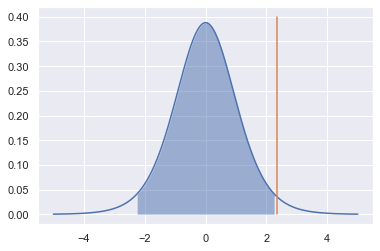

In [7]:
x = np.arange(-5, 5.01, 0.01)
plt.plot(x, stats.t.pdf(x, df))

temp = stats.t.ppf((0.025, 0.975), df)
xxx = np.arange(temp[0], temp[1] + 0.001, 0.001)

plt.fill_between(xxx, 0, stats.t.pdf(xxx, df), alpha=0.5)

xx = np.array([t_val, t_val])
yy = np.array([0, 0.4])
plt.plot(xx, yy)

In [9]:
stats.t.cdf(t_val, df)

0.977711760746946

#### p-값 계산

In [10]:
p_val = (1 - np.abs(1 - 2 * stats.t.cdf(t_val, df)))
p_val

0.04457647850610802

#### scipy stats 모듈을 이용한 t-test

[참고사이트](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_1samp.html)

In [11]:
stats.ttest_1samp(fish, 4.0)

Ttest_1sampResult(statistic=2.332333303493728, pvalue=0.044576478506108116)